# Exercice Decision Tree Classifier 

0. Importez les librairies usuelles 

In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('bl.txt', sep=",")
data.head()

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


1. Importez les data et les afficher

2. Afficher un résumé des statistiques descriptives

In [119]:
data.describe()

,left_weight,left_distance,right_weight,right_distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


3. Afficher la shape du dataset

In [120]:
data.shape

(625, 5)

4. Séparer le dataset en deux array ```X``` et ```Y```

```X``` désignant les variables explicatives / features & ```Y``` la variable cible / target

In [121]:
Y = data.balance
X = data.drop(columns = ["balance"])

In [122]:
X.head()

,left_weight,left_distance,right_weight,right_distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [123]:
Y.head()

0    B
1    R
2    R
3    R
4    R
Name: balance, dtype: object

5. Spliter le dataset (70/30) avec un random_state=42

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify = Y, random_state = 42)

6. Instancier un 'DecisionTreeClassifier' avec un critère de décision GINI

In [125]:
from sklearn import tree

clf_gini = tree.DecisionTreeClassifier()

In [126]:
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

7. Affichez votre arbre de decision

In [127]:
clf_gini = clf_gini.fit(X_train, y_train)

In [128]:
#tree.export_graphviz(clf_gini, out_file='tree.dot')
#tree.plot_tree(clf_gini)

In [162]:
print(clf_gini.max_depth)
print(clf_gini.min_samples_split)
print(clf_gini.min_samples_leaf)

None
2
1


8. Instancier un 'DecisionTreeClassifier' avec un critère de décision "d'information gain"

In [129]:
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy')

9. Afficher votre arbre

In [130]:
clf_entropy = clf_entropy.fit(X_train, y_train)

In [161]:
print(clf_entropy.max_depth)
print(clf_entropy.min_samples_split)
print(clf_entropy.min_samples_leaf)

None
2
1


In [131]:
#tree.export_graphviz(clf_entropy)
#tree.plot_tree(clf_entropy)

10. Vérifier que l'individue X_new est bien classé "Left"

où X_new est l'observation [4, 4, 3, 3]

In [132]:
X_new = [4,4,3,3]

In [133]:
clf_entropy.predict([X_new])

array(['L'], dtype=object)

11. Effectuer une prediction du classifieur GINI sur l'ensemble de test

In [134]:
predicted_gini = clf_gini.predict(X_test)

In [135]:
predicted_gini

array(['B', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B',
       'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
       'B', 'B', 'R', 'L', 'B', 'R', 'R', 'R', 'B', 'R', 'B', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
       'B', 'R', 'L', 'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'R',
       'B', 'R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L',
       'B', 'L', 'R', 'R', 'L', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L

12. Effectuer une prediction du classifieur ENTROPY sur l'ensemble de test

In [136]:
predicted_entropy = clf_entropy.predict(X_test)

In [137]:
predicted_entropy

array(['B', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B',
       'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
       'B', 'B', 'R', 'L', 'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
       'B', 'R', 'L', 'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'R',
       'B', 'R', 'B', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L',
       'B', 'B', 'R', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L

12. Effectuer une comparaison entre les classifieurs GINI & ENTROPY

On prendra pour temoin le dataset de test

In [138]:
X.head()

,left_weight,left_distance,right_weight,right_distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


13. Donner l'accuracy du classifieur GINI

In [153]:
from sklearn.metrics import classification_report

print("GINI")
print(classification_report(y_true = y_test, y_pred = clf_gini.predict(X_test)))

GINI
              precision    recall  f1-score   support

           B       0.04      0.07      0.05        15
           L       0.85      0.85      0.85        87
           R       0.91      0.78      0.84        86

    accuracy                           0.76       188
   macro avg       0.60      0.57      0.58       188
weighted avg       0.81      0.76      0.78       188



In [140]:
# 0.776595744680851

14. Donner l'accuracy du classifieur Entropy 

In [152]:
print("ENTROPY")
print(classification_report(y_true = y_test, y_pred = clf_entropy.predict(X_test)))

ENTROPY
              precision    recall  f1-score   support

           B       0.07      0.13      0.09        15
           L       0.89      0.84      0.86        87
           R       0.91      0.80      0.85        86

    accuracy                           0.77       188
   macro avg       0.62      0.59      0.60       188
weighted avg       0.83      0.77      0.80       188



In [142]:
# 0.7819148936170213

15. Afficher la matrice de confusion du classifieur GINI

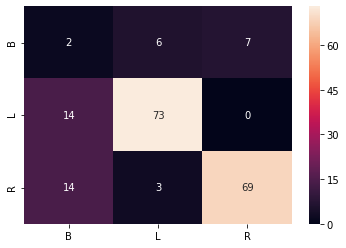

In [155]:
from sklearn.metrics import confusion_matrix
list_values = ["B", "L", "R"]
cm = confusion_matrix(y_test, clf_entropy.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", xticklabels = list_values, yticklabels = list_values )

16) Affichez maintenant les classification report de vos deux modèles, selon vous les modèles sont ils performants ? Sont ils sur-appris?

17) Comment lutter contre le sur-apprentissage dans le cas des arbres de décisions. Tentez de trouver un ensemble d'hyper-paramètres qui permettent d'améliorer le score de test et limiter le sur-apprentissage.

18) On créé de nouvelles variables afin d'améliorer les performances

In [170]:
from sklearn.model_selection import GridSearchCV

max_depth = np.arange(1, 11)
#min_samples_split = np.arange(1, 21)
min_samples_leaf = [1, 5, 10, 20, 50, 100]

hyperparameters = dict(max_depth = max_depth,
   #                    min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(tree.DecisionTreeClassifier(), hyperparameters, cv = 10, verbose=0)


In [171]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': [1,

In [172]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [173]:
grid.best_estimator_.score(X_test, y_test)

0.7712765957446809